In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cs
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle
from sklearn import (cross_validation, feature_selection, pipeline,
                     preprocessing, linear_model, grid_search)
import pandas as pd

C:\Users\aaaaaaaaaaaaaaaaaaaa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\aaaaaaaaaaaaaaaaaaaa\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [9]:
dataset = pd.read_csv('Data.csv')
target = 'Citology'
var = dataset.var().sort_values()
dataset = dataset.fillna(method='pad')

In [10]:
dataset.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Citology
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,0,0,0,1,0,1,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
dataset = dataset.fillna(method='pad')
dataset.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Citology
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,0,0,0,1,0,1,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
sample = dataset[dataset[target] == 1]
control = dataset[dataset[target] == 0]
X_sample = sample.iloc[:, sample.columns != target].values
y_sample = sample.iloc[:, sample.columns ==target].values
X_control = control.iloc[:, control.columns != target].values
y_control = control.iloc[:, control.columns ==target].values
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size = 0.25, random_state = 0)
X_train_control, X_test_control, y_train_control, y_test_control = train_test_split(X_control, y_control, test_size = 0.25, random_state = 0)

In [13]:
sc = StandardScaler()
sc.fit(np.vstack((X_train_sample,X_train_control)))
X_test_sample = sc.transform(X_test_sample)
X_test_control = sc.transform(X_test_control)
X_test_sample = sc.transform(X_train_sample)
X_train_control = sc.transform(X_train_control)

ValueError: could not convert string to float: '?'

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.vstack((X_train_control,X_train_sample)))
X_train_sample = pca.transform(X_train_sample)
X_train_control = pca.transform(X_train_control)
X_test_sample = pca.transform(X_test_sample)
X_test_control = pca.transform(X_test_control)

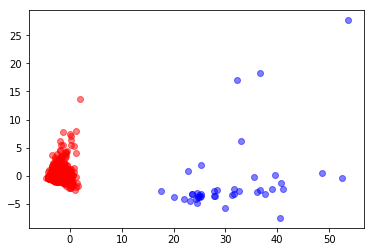

In [8]:
X_train_control = np.transpose(X_train_control)
X_train_sample = np.transpose(X_train_sample)
import matplotlib.pyplot as plt
plt.scatter(X_train_sample[0], X_train_sample[1], c='blue', alpha=0.5)
plt.scatter(X_train_control[0], X_train_control[1], c='red', alpha=0.5)
plt.show()